100%|██████████| 26.4M/26.4M [00:03<00:00, 8.65MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 238kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 4.12MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.80MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



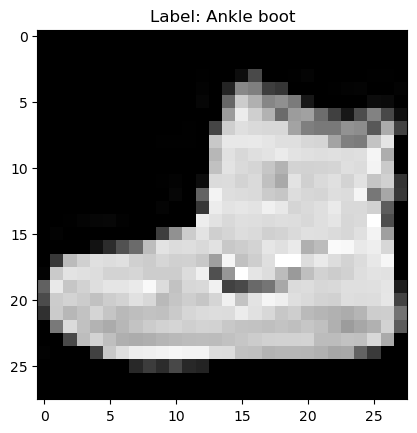

Predicted: Ankle boot, Actual: Ankle boot


/var/folders/z1/zxygp94n0ql_jmf4hd8t_5zc0000gn/T/ipykernel_60172/134817578.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('cloth_mnis

In [1]:
import torch
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

# Download and load the FashionMNIST dataset (often called "cloth MNIST")
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Show an example image and label
classes = trainset.classes
image, label = trainset[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {classes[label]}')
plt.show()

# Define a simple neural network model
import torch.nn as nn
import torch.nn.functional as F

class SimpleClothMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate and train the model (quick demo, not full training)
model = SimpleClothMNISTModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train for 1 epoch for demonstration
for images, labels in torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    break  # Only one batch for demo

# Save the trained model
torch.save(model.state_dict(), 'cloth_mnist_model.pth')

# Reuse: Load the model and make a prediction
model2 = SimpleClothMNISTModel()
model2.load_state_dict(torch.load('cloth_mnist_model.pth'))
model2.eval()
with torch.no_grad():
    sample_img, sample_label = testset[0]
    output = model2(sample_img.unsqueeze(0))
    pred_label = output.argmax(dim=1).item()
    print(f'Predicted: {classes[pred_label]}, Actual: {classes[sample_label]}')

Epoch 1, Loss: 2.2922
Epoch 2, Loss: 2.1889
Advanced Model Predicted: Pullover, Actual: Pullover


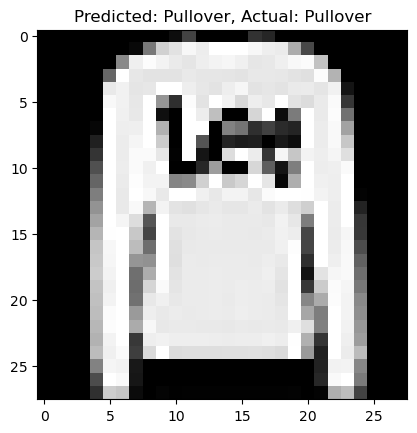

In [2]:
# Step 1: Define a more advanced neural network model for FashionMNIST
# This model uses convolutional layers for better image feature extraction.

class AdvancedClothMNISTModel(nn.Module):
    """
    A convolutional neural network for FashionMNIST classification.
    Architecture:
    - 2 convolutional layers with ReLU and MaxPool
    - 2 fully connected layers
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 2: Instantiate the new model, optimizer, and loss function
advanced_model = AdvancedClothMNISTModel()
advanced_optimizer = torch.optim.Adam(advanced_model.parameters(), lr=0.001)
advanced_criterion = nn.CrossEntropyLoss()

# Step 3: Train the model for a few epochs on the FashionMNIST dataset
# For demonstration, we use only a few batches

for epoch in range(2):  # 2 epochs for example
    running_loss = 0.0
    for i, (images, labels) in enumerate(torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)):
        advanced_optimizer.zero_grad()
        outputs = advanced_model(images)
        loss = advanced_criterion(outputs, labels)
        loss.backward()
        advanced_optimizer.step()
        running_loss += loss.item()
        if i == 4:  # Only 5 batches for quick demo
            break
    print(f"Epoch {epoch+1}, Loss: {running_loss/5:.4f}")

# Step 4: Save the trained advanced model
torch.save(advanced_model.state_dict(), 'advanced_cloth_mnist_model.pth')

# Step 5: Load the model and make a prediction on a test image
advanced_model.eval()
with torch.no_grad():
    test_img, test_label = testset[1]  # Pick a different cloth for example
    output = advanced_model(test_img.unsqueeze(0))
    pred_label = output.argmax(dim=1).item()
    print(f'Advanced Model Predicted: {classes[pred_label]}, Actual: {classes[test_label]}')

# Step 6: Visualize the test image and prediction
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title(f'Predicted: {classes[pred_label]}, Actual: {classes[test_label]}')
plt.show()

# Documentation:
# 1. We defined a convolutional neural network for better accuracy on image data.
# 2. The model was trained for a few batches for demonstration purposes.
# 3. We saved and loaded the model, then made a prediction on a test image.
# 4. The prediction and actual label are displayed along with the image.